# **Load all the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import folium
from folium.plugins import HeatMap
import plotly.express as px

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

from warnings import filterwarnings
filterwarnings('ignore')

# **Load The Data**

In [ ]:
data = pd.read_csv('/content/hotel_bookings.csv')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# **Data Preprocesssing**

## **Create the Copy of Data**

In [ ]:
data_pre = data.copy()

## **Check the missing value**

In [ ]:
null = pd.DataFrame({'Null Values' : data_pre.isna().sum(), 'Percentage Null Values' : (data_pre.isna().sum() / (data_pre.shape[0])) * (100)})
null.sort_values('Percentage Null Values', ascending = False)

,Null Values,Percentage Null Values
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


Based on the output above, there are four features containing missing values, such as **Company**, **Agent**, **Country** and **Children**.


1.   **Company**
      
      As we can see 94.3% of company column are missing values. Therefore we don't have enough values to fill the rows of company column by predicting, filling by mean etc. It seems that the best option is dropping company column.

2.   **Agent**

    If no agent is provided, the booking is most likely made without an agent. In this case, we fill it by **0** value.

3.   **Country**

    Since the **Country** variable is a categorical data type, the missing data in it will be filled by the highest frequency (mode).

4.   **Children**

     There are only 4 missing values in this variable. In this case, we considered that the customer doesn't have any children. So, we filled it by **0** value.








## **Handling Missing Value**

In [ ]:
data_pre = data_pre.drop(['company'], axis =1)
data_pre['agent'] = data_pre['children'].fillna(0)
data_pre['country'] = data_pre['country'].fillna(data_pre['country'].mode().index[0])
data_pre['children'] = data_pre['children'].fillna(0)

In [ ]:
data_pre.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## **Check the Other Variables**

In [ ]:
data_pre['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

Based on data description, Undefined and SC has the same meaning, **No Meal**. Let's change **Undefined** to **SC**!

In [ ]:
data_pre["meal"].replace("Undefined", "SC", inplace=True)

Some rows contain entries with 0 **adults**, 0 **children** and 0 **babies**. We need to drop these entries.

In [ ]:
zero_guest = (data_pre['children'] == 0) & (data_pre['adults'] == 0) & (data_pre['babies'] == 0)
data_pre = data_pre[~zero_guest]
data_pre

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


## **Feature Engineering**

In [ ]:
#Extract the month and day value from reservation_status_date
data_pre['reservation_status_date'] = pd.to_datetime(data_pre['reservation_status_date'], format = '%Y-%m-%d')
data_pre['Month Value'] = data_pre['reservation_status_date'].apply(lambda x: x.month)
data_pre['Day'] = data_pre['reservation_status_date'].apply(lambda x: x.weekday()) + 1
data_pre = data_pre.drop(['reservation_status_date','arrival_date_month',	'arrival_date_week_number',	'arrival_date_day_of_month'], axis = 1)
data_pre.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'Month Value', 'Day'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

## **From where the most guests are coming?**

In [ ]:
#Table
country_guests = data_pre[data_pre['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests.columns = ['country', 'No of guests']
country_guests["Guests in %"] = round(country_guests["No of guests"] / sum(country_guests["No of guests"]) * 100, 2)
country_guests

,country,No of guests,Guests in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


In [ ]:
#Pie Chart
fig = px.pie(country_guests,
             values="No of guests",
             names="country",
             title="Home country of guests",
             template = 'plotly_dark')
fig.update_traces(textposition="inside", textinfo="label+value+percent")
fig.show()

In [ ]:
#Show on Map
basemap = folium.Map()
guests_map = px.choropleth(country_guests, locations = country_guests['country'],
                           color = country_guests['No of guests'], hover_name = country_guests['country'])
guests_map.show()

**People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.**



## **How much do guests pay for a room per night?**

**Both hotels (Resort & City) have different room types and meal arrangements. So the prices vary a lot.**

In [ ]:
data_not_cancelled = data_pre[data_pre['is_canceled'] == 0]

px.box(data_frame = data_not_cancelled, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

In [ ]:
px.box(data_frame = data_not_cancelled, x = 'meal', y = 'adr', color = 'hotel', template = 'plotly_dark')

This figure shows the average price per room, depending on its type and meal arrangement. It's also noted that the same type of letter may not be the same across hotels.

## **How does the price vary per night over the year?**

We can take this information from an average price of each month in two type hotels.

In [ ]:
data_resort = data_pre[(data_pre['hotel'] == 'Resort Hotel') & (data_pre['is_canceled'] == 0)]
data_city = data_pre[(data_pre['hotel'] == 'City Hotel') & (data_pre['is_canceled'] == 0)]

In [ ]:
data_price_resort = data_resort.groupby(['Month Value'])['adr'].mean().reset_index()
data_price_city = data_city.groupby(['Month Value'])['adr'].mean().reset_index()

In [ ]:
data_price_month = pd.concat([data_price_city['Month Value'], data_price_city['adr'], data_price_resort['adr']], axis =1)
data_price_month.columns = ['month', 'price for city','price for resort']
data_price_month

,month,price for city,price for resort
0,1,86.582954,64.818245
1,2,86.249681,53.816204
2,3,89.789021,55.403073
3,4,109.467565,73.739153
4,5,120.958428,75.951913
5,6,117.702041,104.080699
6,7,116.104588,143.032798
7,8,119.122106,184.026001
8,9,112.769835,110.714817
9,10,103.088304,64.405089


Plot the graph

In [ ]:
plt.figure(figsize = (17, 8))

px.line(data_price_month, x = 'month', y = ['price for resort','price for city'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

From the picture above, it can be concluded that the average price of resort hotels reaches the highest value in summer, while the average price of city hotels is lower than resort hotels and reaches its highest price around spring and autumn.

## **Which are the most busy months?**

In [ ]:
data_guests_resort = (data_resort['Month Value'].value_counts().reset_index()).sort_values('index', ascending = True)
data_guests_resort

,index,Month Value
9,1,2086
6,2,2239
5,3,2434
4,4,2527
3,5,2546
10,6,2031
1,7,2977
0,8,3268
7,9,2238
2,10,2645


In [ ]:
data_guests_city = (data_city['Month Value'].value_counts().reset_index()).sort_values('index', ascending = True)
data_guests_city

,index,Month Value
10,1,2525
8,2,2887
7,3,3954
6,4,3996
2,5,4606
5,6,4327
1,7,4747
0,8,5284
3,9,4478
4,10,4340


In [ ]:
data_guests_month = pd.concat([data_guests_city['index'], data_guests_city['Month Value'], data_guests_resort['Month Value']], axis =1)
data_guests_month.columns = ['month', 'Number of guests in City Hotel','Number of guests in Resort Hotel']
data_guests_month = data_guests_month.sort_values('month', ascending = True)
data_guests_month

,month,Number of guests in City Hotel,Number of guests in Resort Hotel
10,1,2525,2031
8,2,2887,2156
7,3,3954,2238
6,4,3996,2239
2,5,4606,2645
5,6,4327,2434
1,7,4747,2977
0,8,5284,3268
3,9,4478,2546
4,10,4340,2527


In [ ]:
plt.figure(figsize = (17, 8))

px.line(data_guests_month, x = 'month', y = ['Number of guests in City Hotel','Number of guests in Resort Hotel'],
        title = 'Total guests per months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

From the picture above, it can be concluded that the number of guests in Resort Hotels reaches the highest value in summer, while the number of guests in City Hotels relatively higher than Resort Hotels (The City Hotels price is relatively cheaper than Resort Hotels) and reaches its highest arrival around summer. Both hotels get the busiest moment in summer (especially August) and the lowest number of visits in winter.

## **How long do people stay at the hotels?**

In [ ]:
data_not_cancelled['Total nights'] = data_not_cancelled['stays_in_week_nights'] + data_not_cancelled['stays_in_weekend_nights']
data_not_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Month Value,Day,Total nights
0,Resort Hotel,0,342,2015,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,7,3,0
1,Resort Hotel,0,737,2015,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,7,3,0
2,Resort Hotel,0,7,2015,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,7,4,1
3,Resort Hotel,0,13,2015,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,7,4,1
4,Resort Hotel,0,14,2015,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0.0,0,Transient,98.00,0,1,Check-Out,7,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0.0,0,Transient,96.14,0,0,Check-Out,9,3,7
119386,City Hotel,0,102,2017,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0.0,0,Transient,225.43,0,2,Check-Out,9,4,7
119387,City Hotel,0,34,2017,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0.0,0,Transient,157.71,0,4,Check-Out,9,4,7
119388,City Hotel,0,109,2017,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0.0,0,Transient,104.40,0,0,Check-Out,9,4,7


In [ ]:
data_time_stay = data_not_cancelled.groupby(['Total nights', 'hotel']).count().reset_index()
data_time_stay = data_time_stay.iloc[:,:3]
data_time_stay = data_time_stay.rename(columns = {'is_canceled' : 'Number of guests staying'})
data_time_stay

,Total nights,hotel,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Month Value,Day
0,0,City Hotel,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
1,0,Resort Hotel,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371,371
2,1,City Hotel,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155
3,1,Resort Hotel,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579
4,2,City Hotel,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,46,Resort Hotel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
58,48,City Hotel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
59,56,Resort Hotel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
60,60,Resort Hotel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
fig = px.bar(data_frame =data_time_stay, x = 'Total nights', y = 'Number of guests staying', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

fig.update_xaxes(range=[0,25])
fig.show()

For 1-5 total nights, City Hotel is preferable, while Resort Hotel is preferable for more than five nights.

## **`Market_segment` variable exploration**

In [ ]:
data_ms = data_not_cancelled.groupby(['market_segment']).count().reset_index()
data_ms = data_ms.iloc[:,:2]
data_ms = data_ms.rename(columns = {'hotel' : 'Number of guests staying'})
data_ms ['Percentage'] = data_ms['Number of guests staying']/sum(data_ms['Number of guests staying']) * 100
data_ms

,market_segment,Number of guests staying,Percentage
0,Aviation,183,0.243964
1,Complementary,639,0.851875
2,Corporate,4291,5.720494
3,Direct,10648,14.195251
4,Groups,7697,10.261162
5,Offline TA/TO,15880,21.170228
6,Online TA,35673,47.557025


In [ ]:
fig = px.bar(data_frame =data_ms, x = 'market_segment', y = 'Number of guests staying', barmode = 'group',
        template = 'plotly_dark')

fig.update_layout(barmode='group', xaxis={'categoryorder':'total descending'})
fig.show()

More than 45% of bookings are made via `Online Travel Agents` and around 21% of bookings made via `Offline Travel Agents`. Less than 20% of bookings made directly without any agents.

## **`Arrival Month` vs `ADR` vs `Booking Cancellation Status`**




Text(0, 0.5, 'ADR')

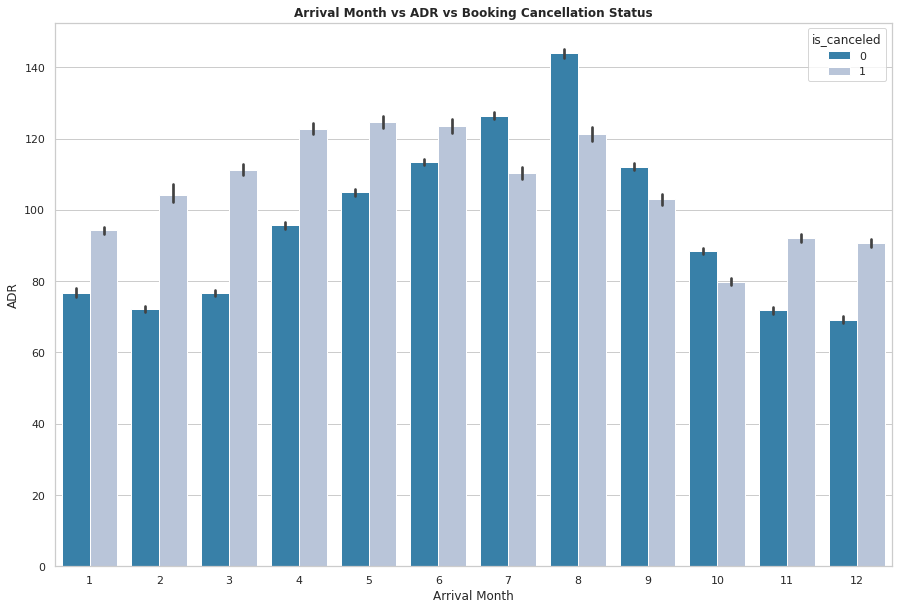

In [ ]:
data_pre['adr'] = data_pre['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='Month Value', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=data_pre, order=data_price_month['month'].unique())
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

Except for rush months like August, July, and September, canceled bookings have higher ADR than not canceled bookings. Maybe this highest rate in those months could be one of the reasons for canceled bookings.

## **How many bookings were cancelled?**

In [ ]:
data_booking =  data_pre['is_canceled'].value_counts().reset_index()
data_booking.columns = ['Booking', 'Count']
data_booking['Booking'] = data_booking['Booking'].map({0 : 'Booking',1 :'Cancelled'})
data_booking['Percentage'] = round(data_booking['Count']/sum(data_booking['Count'])*100,2)
data_booking

,Booking,Count,Percentage
0,Booking,75011,62.92
1,Cancelled,44199,37.08


In [ ]:
fig = px.pie(data_booking,
             values="Count",
             names="Booking",
             title="Booking cancelled or not",
             template = 'plotly_dark')
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

Based on the pie chart above, we can coclude that there are $37.1$% bookings were cancelled.

It is also indicating, this target variable is categorized into **Imbalance data**. So, We need to use **SMOTE** technique. The computation will be calculated in the modelling section.

# **Data Preparation for Modelling**

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 957 kB 50.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
#Change the value type of nominal variables that contains integer value to compute the corelations
#Change categorical value to str to calculate correlation
data_pro = data_pre.copy()
data_pro = data_pro.reset_index().drop(['index'], axis= 1)
data_pro = data_pro.astype({"is_canceled": str, "is_repeated_guest" : str})

In [ ]:
from dython.nominal import associations
corre = associations(data_pro, figsize = (30,20), mark_columns = True)
(corre['corr']['is_canceled (nom)']).sort_values(ascending = False)

ContextualVersionConflict: ignored

Based on the output above, we can conclude that reservation_status is the most impactful variable. But, it seems unlessfull since this variable indicating the customer status as well as target variable. So, we need to drop it. 

Some variables also may be deleted to make the model more general.

In [ ]:
data_pro = data_pro.astype({"is_canceled": int, "is_repeated_guest" : int})
useless = ['reservation_status','assigned_room_type','booking_changes', 'country','days_in_waiting_list','arrival_date_year']
data_pro = data_pro.drop(useless, axis = 1)
data_pro.columns

**Base Dummies variables for categorical variables**

`hotel` : City Hotel (base)

`meal`  : BB (base)

`market_segment`  : Aviation (base)

`distribution_channel`  : Corporate (base)

`reserved_room_type` :  A (base)

`deposit_type`   : No Deposit (base)

`customer_type`  : Contract (base)


In [ ]:
data_pro = pd.get_dummies(data = data_pro, columns = ['Month Value', 'Day','hotel','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type'], drop_first = True)
data_pro.columns

## **Standardize the numerical variables**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class CustomScaler(BaseEstimator,TransformerMixin):
    def __init__ (self,columns):
        self.scaler = StandardScaler()
        self.columns = columns
        
    def fit(self, X, y = None):
        self.scaler.fit(X[self.columns],y)
        return self
    
    def transform(self,X,y=None):
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        X_combine = pd.concat([X_scaled, X_not_scaled], axis = 1)[X.columns]
        return X_combine

In [ ]:
categoric = ['is_canceled','is_repeated_guest','hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'reserved_room_type_L', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party','Month Value_2', 'Month Value_3', 'Month Value_4', 'Month Value_5',
       'Month Value_6', 'Month Value_7', 'Month Value_8', 'Month Value_9',
       'Month Value_10', 'Month Value_11', 'Month Value_12', 'Day_2', 'Day_3',
       'Day_4', 'Day_5', 'Day_6', 'Day_7']
numeric = [x for x in data_pro if x not in categoric]

In [ ]:
data_scaler = CustomScaler(numeric)
data_scaler.fit(data_pro)

In [ ]:
scaled_data = data_scaler.transform(data_pro)
scaled_data.head()

## **Handling the Imbalanced Data Set**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = scaled_data.drop(['is_canceled'], axis = 1)
Y = scaled_data['is_canceled']

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X, Y)

In [ ]:
Y_sm=pd.Series(Y_sm)
Y_sm.value_counts()

In [ ]:
X_sm

## **Split the Data into Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.2, random_state = 42)

# **Model Building**

In [ ]:
model_name = ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier','XgBoost','KNN','Ada Boost Classifier',
             'LGBM','Gradient Boosting Classifier']
models = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),LGBMClassifier(),GradientBoostingClassifier()]
acc_model = []
cv_model = []
fit_model = []

In [ ]:
def model(alg, X_train, X_test, Y_train, Y_test):
    alg_model = alg.fit(X_train, Y_train)
    global Y_prob, Y_pred
    Y_prob = alg_model.predict_proba(X_test)[:,1]
    Y_pred = alg_model.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    cv_score=cross_val_score(alg_model,X_sm,Y_sm,cv=5)
    acc_model.append(acc)
    cv_model.append(cv_score)
    fit_model.append(alg_model)

In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dython 0.7.1.post4 requires matplotlib>=3.4.3, but you have matplotlib 3.1.3 which is incompatible.


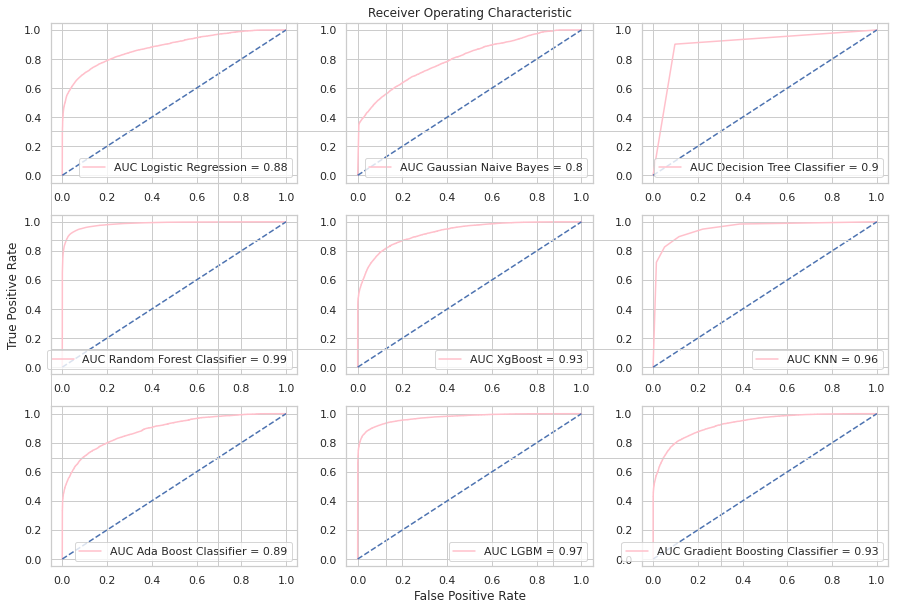

In [ ]:
indeks = 0
fig, ax = plt.subplots(3,3, figsize = (15,10))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i in range(3):
  for j in range(3):
    model(models[indeks], X_train, X_test, Y_train, Y_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    label_plot = f'AUC {model_name[indeks]} = {round(roc_auc,2)}'
    ax[i][j].plot(false_positive_rate, true_positive_rate, color = 'pink', label = label_plot)
    ax[i][j].legend(loc = 'lower right')
    ax[i][j].plot([0, 1], [0, 1], linestyle = '--')
    ax[i][j].axis('tight')
    indeks += 1

In [ ]:
models = pd.DataFrame({
    'Model' : model_name,
    'Score' : acc_model
})

In [ ]:
models = models.sort_values('Score', ascending = False)
models

,Model,Score
3,Random Forest Classifier,0.940743
7,LGBM,0.919647
2,Decision Tree Classifier,0.901983
5,KNN,0.891118
8,Gradient Boosting Classifier,0.849458
4,XgBoost,0.844359
6,Ada Boost Classifier,0.802866
0,Logistic Regression,0.801433
1,Gaussian Naive Bayes,0.637727


## **Feature Important**

In [ ]:
model_rfc = RandomForestClassifier().fit(X_train, Y_train)

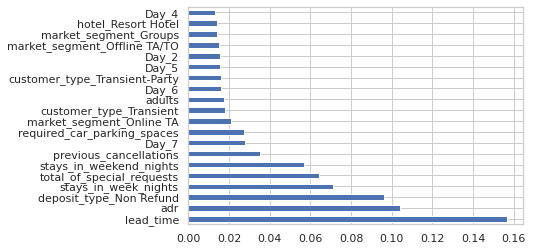

In [ ]:
feat_importances = pd.Series(fit_model[3].feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
feat_importances.nlargest(10)

lead_time                      0.155787
Day                            0.113110
adr                            0.104146
deposit_type_Non Refund        0.093260
Month Value                    0.091684
stays_in_week_nights           0.067826
total_of_special_requests      0.063900
stays_in_weekend_nights        0.060774
previous_cancellations         0.032892
required_car_parking_spaces    0.027550
dtype: float64

## **Looking the three most important variables/features**



*   `lead_time`
*   `Day`
*   `deposit_type_Non Refund`


Let's looking one by one.





### **`lead_time`**

In [ ]:
lead_cancel_data = data_pre.groupby("lead_time")["is_canceled"].describe()
print(lead_cancel_data)

            count      mean       std  min  25%  50%  75%  max
lead_time                                                     
0          6264.0  0.066571  0.249297  0.0  0.0  0.0  0.0  1.0
1          3445.0  0.092308  0.289502  0.0  0.0  0.0  0.0  1.0
2          2065.0  0.103148  0.304225  0.0  0.0  0.0  0.0  1.0
3          1815.0  0.100275  0.300450  0.0  0.0  0.0  0.0  1.0
4          1710.0  0.102339  0.303182  0.0  0.0  0.0  0.0  1.0
...           ...       ...       ...  ...  ...  ...  ...  ...
622          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
626          30.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
629          17.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
709           1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
737           1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0

[479 rows x 8 columns]


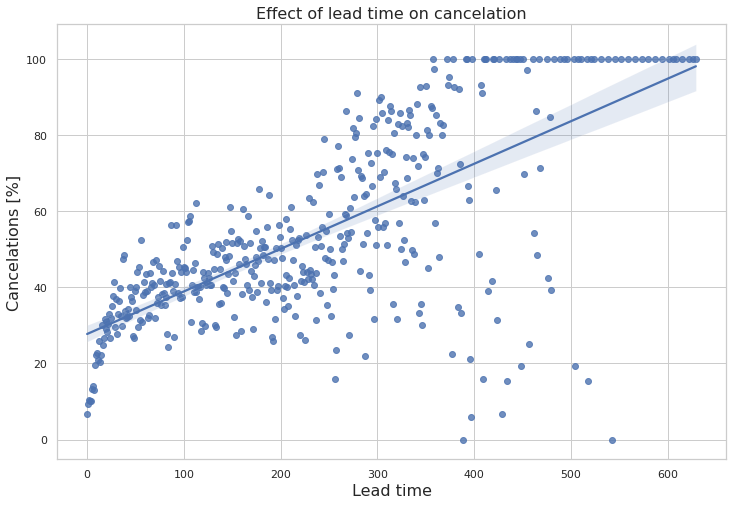

In [ ]:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often.

### **`deposit_type`**



In [ ]:
deposit_cancel = data_pre[data_pre['is_canceled']==1]['deposit_type'].value_counts().reset_index()
deposit_cancel.columns = ['Deposit Type', 'Total Cancelled']
deposit_cancel['Cancelled Percentage'] = round((deposit_cancel['Total Cancelled']/sum(deposit_cancel['Total Cancelled']))*100,2)

deposit_cancel

,Deposit Type,Total Cancelled,Cancelled Percentage
0,No Deposit,29669,67.13
1,Non Refund,14494,32.79
2,Refundable,36,0.08


In [ ]:
fig = px.pie(deposit_cancel,
             values = "Total Cancelled",
             names = "Deposit Type",
             title = "Booking Cancellation Percentage Based On Deposit Type",
             template = "plotly_dark")
fig.update_traces(textposition = "inside", textinfo = "label+percent")
fig.show()

In [ ]:
#data_cancelled = data_pre[data_pre['is_canceled'] == 1]
deposit_cancel = data_pre.groupby(['deposit_type','is_canceled']).count().reset_index()
deposit_cancel = deposit_cancel.iloc[:,:3]
deposit_cancel = deposit_cancel.rename(columns = {'hotel' : 'Total'})
deposit_cancel

,deposit_type,is_canceled,Total
0,No Deposit,0,74792
1,No Deposit,1,29669
2,Non Refund,0,93
3,Non Refund,1,14494
4,Refundable,0,126
5,Refundable,1,36


In [ ]:
fig = px.histogram(deposit_cancel, x = 'deposit_type', y = 'Total', color = 'is_canceled', barmode = 'group', template = 'plotly_dark')
fig.show()

There are still many hotels that implement the **No Deposit** system. However, customers who book hotels with **No deposit** type are less likely to cancel their orders. This is indeed favored by customers because there is no need for additional fees to be included in the order.

However, when compared to the hotels with **Non Refundable** type, it can be shown that the percentage of customers at the hotels with **No Deposit** type cancels their orders more than hotels with **Non Refundable** type.

### **`adr`**

In [ ]:
#Median
data_pre['adr'].median()

In [ ]:
adr_lowermed = data_pre[(data_pre['adr']>0) & (data_pre['adr']<=94.95)]
adr_greatermed = data_pre[data_pre['adr']>94.95]

In [ ]:
adr_iscancelled = pd.DataFrame({
    'adr_low' : adr_lowermed.groupby('is_canceled')['adr'].count(),
    'adr_high' : adr_greatermed.groupby('is_canceled')['adr'].count()
})
adr_iscancelled

,adr_low,adr_high
is_canceled,,
0,36997,36391
1,20803,23208


From the output table above, we can conclude that 
1. The low **adr** doesn't cancel more hotel booking than the high **adr**.
2. The high **adr** cancel more hotel booking than the low **adr**.



# Conclusion

1. 